# Multi Linear Regression

Simple Linear Regression is a linear approach to modeling the relationship between single independent variable with one dependent variable. It finds a linear funcion that maps dependent variable y as a function of independent variable x. (Wikipedia)

Usually the function is written as $$ y = mx + c $$ or alternatively, $$  y =\theta_1 x + \theta_0 $$

Reference: https://towardsdatascience.com/

The project has the following tasks:

1. Understand the data that you are going to work with and convert it to a data frame.
2. Prepare the data for building the model.
3. Create and build the machine learning model.
4. Visualize the results
5. Measure the performance of the model.

## Task 1: Import  dataset

In [ ]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [ ]:
# prompt: read data from my system with upload

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

data = pd.read_csv(list(uploaded.keys())[0]) #
# Now you can work with the dataframe 'df'
data.head()

Saving marks_prediction_data.csv to marks_prediction_data.csv


,Name,Number of Courses,Time Studied (hrs),Test 1 Score,Test 2 Score,Test 3 Score,Final Exam Score
0,John,4,80,85,90,87,92
1,Mary,3,60,75,80,78,83
2,Bob,5,100,92,87,90,95
3,Ann,6,120,89,93,91,94
4,Tim,4,75,80,85,82,87


In [ ]:
## Import the dataset


# change the path as necessary
X = data.iloc[:, 1:-1].values # copy all columns excluding last column
Y = data.iloc[:, -1:].values   # copy the last column only
X


array([[  4,  80,  85,  90,  87],
       [  3,  60,  75,  80,  78],
       [  5, 100,  92,  87,  90],
       [  6, 120,  89,  93,  91],
       [  4,  75,  80,  85,  82],
       [  3,  50,  70,  75,  72],
       [  4,  90,  88,  91,  89],
       [  3,  65,  78,  82,  80],
       [  5, 110,  91,  89,  93],
       [  4,  70,  82,  86,  84],
       [  3,  55,  73,  77,  75],
       [  6, 105,  90,  92,  94],
       [  4,  85,  86,  88,  85],
       [  3,  62,  79,  83,  81],
       [  5,  95,  89,  87,  91],
       [  4,  75,  83,  85,  82],
       [  3,  48,  70,  73,  71],
       [  4,  85,  87,  88,  86],
       [  3,  60,  76,  79,  77],
       [  5,  95,  91,  90,  92]])

In [ ]:
Y

array([[92],
       [83],
       [95],
       [94],
       [87],
       [77],
       [92],
       [85],
       [96],
       [88],
       [80],
       [97],
       [90],
       [86],
       [94],
       [88],
       [76],
       [91],
       [82],
       [96]])

In [ ]:
# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(20, 5)
(20, 1)


## Task 2: Prepare and visualize the given data set

In [ ]:
# Visualize the dataset

data.iloc[:,1:].corr()


,Number of Courses,Time Studied (hrs),Test 1 Score,Test 2 Score,Test 3 Score,Final Exam Score
Number of Courses,1.000000,0.942725,0.858918,0.818452,0.888865,0.870997
Time Studied (hrs),0.942725,1.000000,0.936237,0.897307,0.945528,0.933122
Test 1 Score,0.858918,0.936237,1.000000,0.931513,0.978346,0.986683
Test 2 Score,0.818452,0.897307,0.931513,1.000000,0.945146,0.949106
Test 3 Score,0.888865,0.945528,0.978346,0.945146,1.000000,0.994178
Final Exam Score,0.870997,0.933122,0.986683,0.949106,0.994178,1.000000


<Axes: >

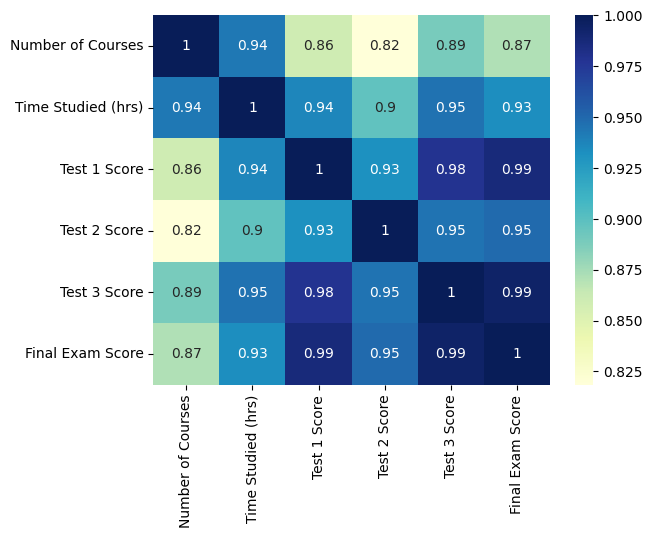

In [ ]:
sns.heatmap(data.iloc[:,1:].corr(), annot=True,cmap="YlGnBu")

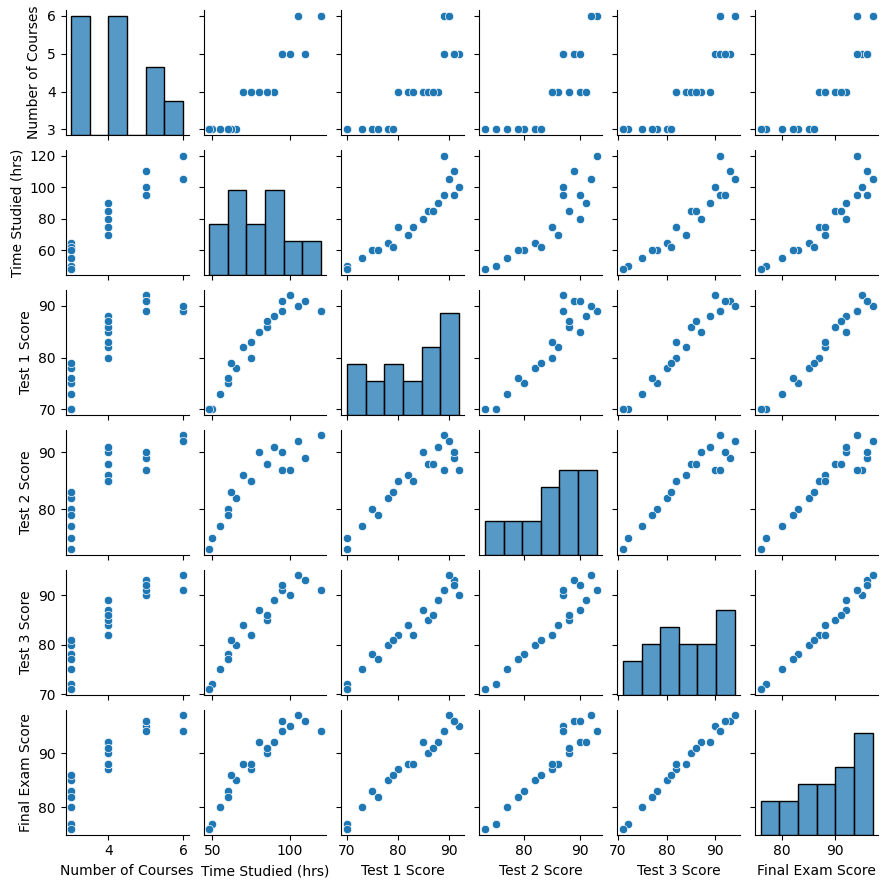

In [ ]:
sns.pairplot(data.iloc[:,1:],height=1.5)

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

# There are 30 observations or rows in the dataset.
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size.
# In this example test_size=1/3 says that 20 observations are used for training
# and rest 10 observations are used for testing.

# randam_state is the seed for the random number generator.


## Task 3: Create and train the machine learning model

In [ ]:
# Fit Simple Linear Regression to the Training dataset

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)


LinearRegression()

## Task 4: Visualize the results

In [ ]:
# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [[ 0.29733782 -0.04473862  0.32030154  0.05578457  0.63143953]]
Intercept = Theta0 =  [6.55558658]


## Task 5: Making Predictions

In [ ]:
Y_predict = model.predict(X_test)

## Task 6: Performance measures

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

# The mean squared error
print("Mean squared error train = %.2f" % mean_squared_error(model.predict(X_train),Y_train)) #training Error
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict)) #test error
print("Mean absolute error = %.2f" % mean_absolute_error(Y_test, Y_predict)) #test error
# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error train = 0.23
Mean squared error = 0.13
Mean absolute error = 0.30
Variance score = 1.00


In [ ]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df1 = pd.read_csv(list(uploaded.keys())[0]) #
# Now you can work with the dataframe 'df'
df1.head()

Saving new_marks_prediction_data.csv to new_marks_prediction_data.csv


,Number of Courses,Time Studied (hrs),Test 1 Score,Test 2 Score,Test 3 Score,Final Exam Score
0,4,90,96,94,95,97


In [ ]:
df2 = df1.iloc[:, :-1]
predicted_val= model.predict(df2)
predicted_val

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[99.69791439]])